# Frequency based Embeddings

## Word Embeddings

word embedding is a technique in natural language processing (NLP) that represents word as dense vectors of real numbers in a low-dimensional space.
Unlike traditional one-hot encoding, which represents words as sparse, high-dimensional vectors, word embeddings capture semantic relationships between words, allowing machines to understand linguistic context and meaning more effectively.

## Types of Word Embeddings

1. Frequency based Embedding
2. prediction based Embedding

## Frequency Based Embedding 
Frequency based Embeddings focus on creating word representations by analyzing the statistical occurences of words in a corpus
### Characterstics:
- Rely on counting word occurences
- Capture global statistical information about words
- typically use matrix factorization techniques

### Main techniques: 
#### Count Vectors
- Simplest form of frequency based embeddings
- create a matrix where each row represents a word
- columns represt context(surrouding words)
- values indicate frequency of co-occurence

#### TF-IDF (Term Frequency-Inverse Document Frequency)
- Weighs word importance by frequency in a document
- reduces impact of very common words
- highlights unique or distinctive terms

#### Latent Sematic Analysis 
- Uses Singular Value Decomposition (SVD)
- Reduces dimensionality of count vectors
- Captures semantic relationships between words
- handles synonmyn and polysemy

#### GloVe (Global Vectors)
- combines global matrix factorization with local context window
- learns word vectors by capturing global corpus statistics
- balance global and local context information
- prediction based word embeddings

## Frequency Based Embedding

### Count Vectorization

In [6]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd 

In [2]:
text = ['The quick brown fox jumped over the lazy dog']

In [4]:
vectorizer = CountVectorizer()
vectorizer.fit(text)
vectorizer.vocabulary_

{'the': 7,
 'quick': 6,
 'brown': 0,
 'fox': 2,
 'jumped': 3,
 'over': 5,
 'lazy': 4,
 'dog': 1}

In [5]:
# Encode the Document
vector = vectorizer.transform(text)
vector.shape

(1, 8)

In [7]:
vector = vectorizer.transform(text)
vector.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 2]])

In [9]:
df = pd.DataFrame(vector.todense())
df

,0,1,2,3,4,5,6,7
0,1,1,1,1,1,1,1,2


### TF-IDF

### Formula
<img src="./frm-tf-idf.png" width="400" height="300">

In [10]:
text_2 = ['The quick brown fox jumped over the lazy dog','The dog','The fox']

In [11]:
vectorizer_2 = TfidfVectorizer()

vectorizer_2.fit(text_2)
vectorizer_2.vocabulary_

{'the': 7,
 'quick': 6,
 'brown': 0,
 'fox': 2,
 'jumped': 3,
 'over': 5,
 'lazy': 4,
 'dog': 1}

In [12]:
# Encoding document
vector_2 = vectorizer_2.transform(text_2)

In [13]:
vector_2.toarray()

array([[0.36388646, 0.27674503, 0.27674503, 0.36388646, 0.36388646,
        0.36388646, 0.36388646, 0.42983441],
       [0.        , 0.78980693, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.61335554],
       [0.        , 0.        , 0.78980693, 0.        , 0.        ,
        0.        , 0.        , 0.61335554]])

In [14]:
pd.DataFrame(vector_2.todense())

,0,1,2,3,4,5,6,7
0,0.363886,0.276745,0.276745,0.363886,0.363886,0.363886,0.363886,0.429834
1,0.000000,0.789807,0.000000,0.000000,0.000000,0.000000,0.000000,0.613356
2,0.000000,0.000000,0.789807,0.000000,0.000000,0.000000,0.000000,0.613356


In [15]:
# try to get cosine similarity 
cosine_similarity(vector, vector_2)


array([[0.9746629 , 0.60800305, 0.60800305]])

### Co-occurence Matrix

In [2]:
from io import StringIO
import seaborn as sns

In [9]:
data_tsv = StringIO("""
city    province    position
0   Massena     NY  jr
1   Maysville   KY  pm
2   Massena     NY  m
3   Athens      OH  jr
4   Hamilton    OH  sr
5   Englewood   OH  jr
6   Saluda      SC  sr
7   Batesburg   SC  pm
8   Paragould   AR  m""")

In [10]:
data_frame = pd.read_csv(data_tsv, delimiter=r"\s+")

In [11]:
data_frame

,city,province,position
0,Massena,NY,jr
1,Maysville,KY,pm
2,Massena,NY,m
3,Athens,OH,jr
4,Hamilton,OH,sr
5,Englewood,OH,jr
6,Saluda,SC,sr
7,Batesburg,SC,pm
8,Paragould,AR,m


### Convert to co-occurence matrix

In [13]:
co_matrix = pd.crosstab(data_frame.province, data_frame.position)
co_matrix

position,jr,m,pm,sr
province,,,,
AR,0,1,0,0
KY,0,0,1,0
NY,1,1,0,0
OH,2,0,0,1
SC,0,0,1,1


### Heat-map of co-occurence matrix

<Axes: xlabel='position', ylabel='province'>

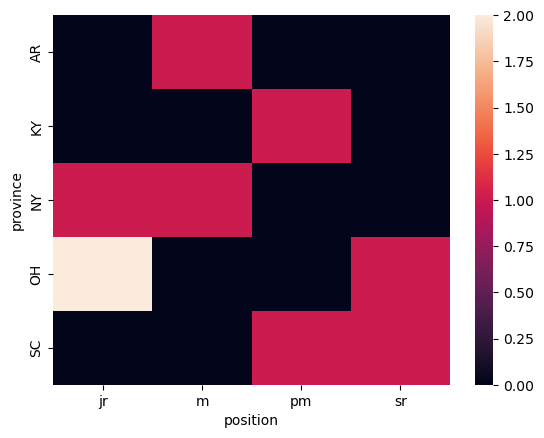

In [14]:
sns.heatmap(co_matrix)